<a href="https://colab.research.google.com/github/ravikanthpn/crashdata/blob/main/Monroe_county_crash_data__Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proposal:**

**Dataset description:** 

Dataset contains crash data collected between 2003 and 2015 years in MOnroe County. The dataset was filtered by weekday and weekend, collision type (1-car, 2-cars, 3+ cars, Bus, Pedestrian, Moped/Motorcycle, Cyclist), injury type (no injury/unknown, Fatal, Incapacitating, Non-incapacitating), 50 different Primary Factors, accident locations with latitude, longitude co-ordinates in Monroe county.

**Questions to be answered:**

1. Primary factors that are causing maximum number of accidents 
2. Is there any correlation between rush hour and non-rush hour on the number of accidents
3. Testing statistical significance between rush hour and non-rush hour total accidents
4. Is there any location dependency on number of accidents?

In [ ]:
import requests  
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_excel("https://raw.githubusercontent.com/ravikanthpn/crashdata/main/monroe-county-crash-data2003-to-2015.xls")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Master Record Number  53943 non-null  int64  
 1   Year                  53943 non-null  int64  
 2   Month                 53943 non-null  int64  
 3   Day                   53943 non-null  int64  
 4   Weekend?              53875 non-null  object 
 5   Hour                  53718 non-null  float64
 6   Collision Type        53937 non-null  object 
 7   Injury Type           53943 non-null  object 
 8   Primary Factor        52822 non-null  object 
 9   Reported_Location     53908 non-null  object 
 10  Latitude              53913 non-null  float64
 11  Longitude             53913 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.9+ MB


In [ ]:
df.describe()

,Master Record Number,Year,Month,Day,Hour,Latitude,Longitude
count,5.394300e+04,53943.000000,53943.000000,53943.000000,53718.000000,53913.000000,53913.000000
mean,6.748119e+08,2008.968059,6.662162,4.196912,1347.265349,35.582109,-78.619224
std,3.907563e+08,3.789760,3.514630,1.909440,531.654039,11.289883,24.957587
min,1.470500e+04,2003.000000,1.000000,1.000000,0.000000,0.000000,-88.959213
25%,1.991074e+06,2006.000000,4.000000,3.000000,1000.000000,39.142048,-86.551520
50%,9.011241e+08,2009.000000,7.000000,4.000000,1400.000000,39.164430,-86.530992
75%,9.019039e+08,2012.000000,10.000000,6.000000,1700.000000,39.173344,-86.508288
max,9.026394e+08,2015.000000,12.000000,7.000000,2300.000000,41.228665,86.596363


In [ ]:
df.columns

Index(['Master Record Number', 'Year', 'Month', 'Day', 'Weekend?', 'Hour',
       'Collision Type', 'Injury Type', 'Primary Factor', 'Reported_Location',
       'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
df.head(3)

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890


In [ ]:
df['morning_rushhour_6am_10am'] = np.where((df["Hour"]>= 600) & (df["Hour"]<=1000), 1,0)
df['evening_rushhour_3pm_7pm']=np.where((df["Hour"]>= 1500) & (df["Hour"]<=1900),1,0)
df['Morning_non_rushhour_0am_6am']=np.where((df["Hour"]>=0) & (df["Hour"]<600),1,0)
df['Noon_non_rushhour_10am_3pm']=np.where((df["Hour"]>1000) & (df["Hour"]<1500),1,0)
df['Night_non_rushhour_7pm_0am']=np.where((df["Hour"]>1900) & (df["Hour"]<2400),1,0)
df.head(5)

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude,morning_rushhour_6am_10am,evening_rushhour_3pm_7pm,Morning_non_rushhour_0am_6am,Noon_non_rushhour_10am_3pm,Night_non_rushhour_7pm_0am
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874,0,0,1,0,0
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848,0,1,0,0,0
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890,0,0,0,0,1
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956,1,0,0,0,0
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625,0,0,0,1,0


In [ ]:
df.isnull().sum()

Master Record Number               0
Year                               0
Month                              0
Day                                0
Weekend?                          68
Hour                             225
Collision Type                     6
Injury Type                        0
Primary Factor                  1121
Reported_Location                 35
Latitude                          30
Longitude                         30
morning_rushhour_6am_10am          0
evening_rushhour_3pm_7pm           0
Morning_non_rushhour_0am_6am       0
Noon_non_rushhour_10am_3pm         0
Night_non_rushhour_7pm_0am         0
dtype: int64

In [ ]:
df.columns

Index(['Master Record Number', 'Year', 'Month', 'Day', 'Weekend?', 'Hour',
       'Collision Type', 'Injury Type', 'Primary Factor', 'Reported_Location',
       'Latitude', 'Longitude', 'morning_rushhour_6am_10am',
       'evening_rushhour_3pm_7pm', 'Morning_non_rushhour_0am_6am',
       'Noon_non_rushhour_10am_3pm', 'Night_non_rushhour_7pm_0am'],
      dtype='object')

In [ ]:
print(df.size)

# Drop `NaN` rows
clean_project = df.dropna()

# Print the size of the modified DataFrame
print(clean_project.size)

917031
893894


In [ ]:
pd.set_option('display.max_rows', None)
clean_project.groupby(['Year', 'Hour'])['morning_rushhour_6am_10am', 'evening_rushhour_3pm_7pm'].agg(['count'])
clean_project.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude,morning_rushhour_6am_10am,evening_rushhour_3pm_7pm,Morning_non_rushhour_0am_6am,Noon_non_rushhour_10am_3pm,Night_non_rushhour_7pm_0am
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874,0,0,1,0,0
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848,0,1,0,0,0


In [ ]:
piv1=pd.pivot_table(clean_project,index=["Primary Factor"], values=["morning_rushhour_6am_10am", "evening_rushhour_3pm_7pm","Morning_non_rushhour_0am_6am","Noon_non_rushhour_10am_3pm","Night_non_rushhour_7pm_0am"],  aggfunc={"morning_rushhour_6am_10am":np.sum,"evening_rushhour_3pm_7pm":np.sum,"Morning_non_rushhour_0am_6am":np.sum,"Noon_non_rushhour_10am_3pm":np.sum,"Night_non_rushhour_7pm_0am":np.sum})
piv1['total']=piv1['morning_rushhour_6am_10am'] + piv1['evening_rushhour_3pm_7pm'] + piv1['Morning_non_rushhour_0am_6am'] + piv1['Night_non_rushhour_7pm_0am'] + piv1['Noon_non_rushhour_10am_3pm']
pd.options.display.float_format = '{:.0f}'.format
piv1.sort_values(by=["total"]).tail(15)


,Morning_non_rushhour_0am_6am,Night_non_rushhour_7pm_0am,Noon_non_rushhour_10am_3pm,evening_rushhour_3pm_7pm,morning_rushhour_6am_10am,total
Primary Factor,,,,,,
ALCOHOLIC BEVERAGES,392,196,42,137,31,798
IMPROPER LANE USAGE,77,123,288,358,132,978
LEFT OF CENTER,86,135,253,341,256,1071
ROADWAY SURFACE CONDITION,116,188,219,347,391,1261
UNSAFE SPEED,201,199,359,458,275,1492
DRIVER DISTRACTED - EXPLAIN IN NARRATIVE,68,171,427,691,295,1652
ANIMAL/OBJECT IN ROADWAY,389,471,93,377,356,1686
IMPROPER TURNING,117,272,497,683,267,1836
SPEED TOO FAST FOR WEATHER CONDITIONS,180,265,398,625,449,1917


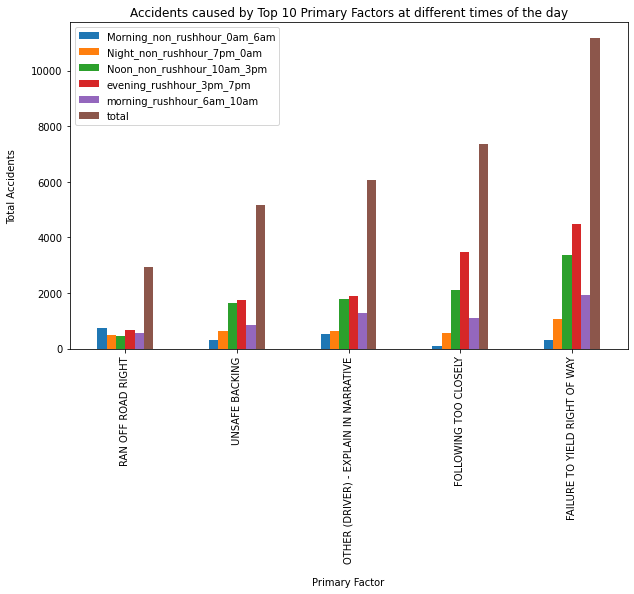

In [ ]:
piv1.sort_values(by=["total"]).tail(5).plot(kind='bar',figsize=(10,6))
plt.xlabel("Primary Factor", labelpad=14)
plt.ylabel("Total Accidents", labelpad=14)
plt.title("Accidents caused by Top 10 Primary Factors at different times of the day", y=1);

**Top 3 reasons for the highest number of accidents:**

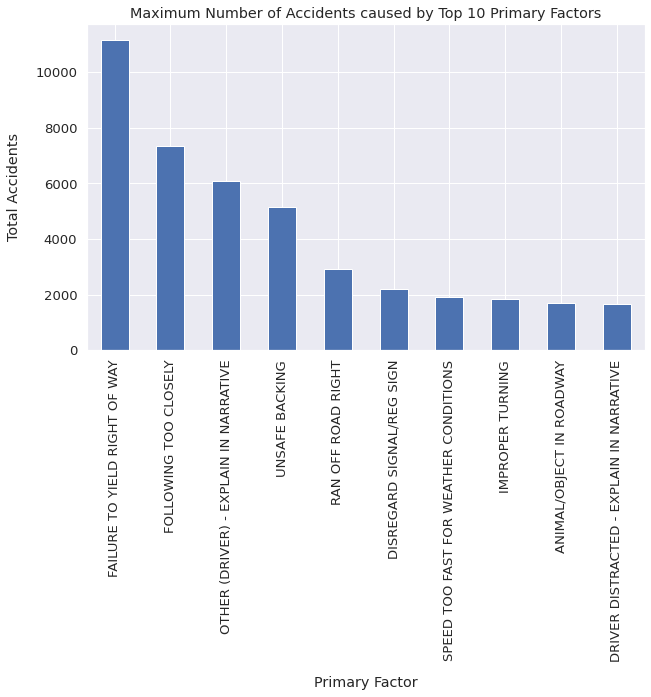

In [ ]:
sns.set(font_scale=1.2)
clean_project['Primary Factor'].value_counts().head(10).plot(kind='bar', figsize=(10, 6))
plt.xlabel("Primary Factor", labelpad=14)
plt.ylabel("Total Accidents", labelpad=14)
plt.title("Maximum Number of Accidents caused by Top 10 Primary Factors", y=1);

**Top 3 resons for highest number of accidents are:**
**1. Failure to yield right of way**
**2. Following too closely**
**3. Other (driver)**

**Top 5 reasons for Fatal accidents:**

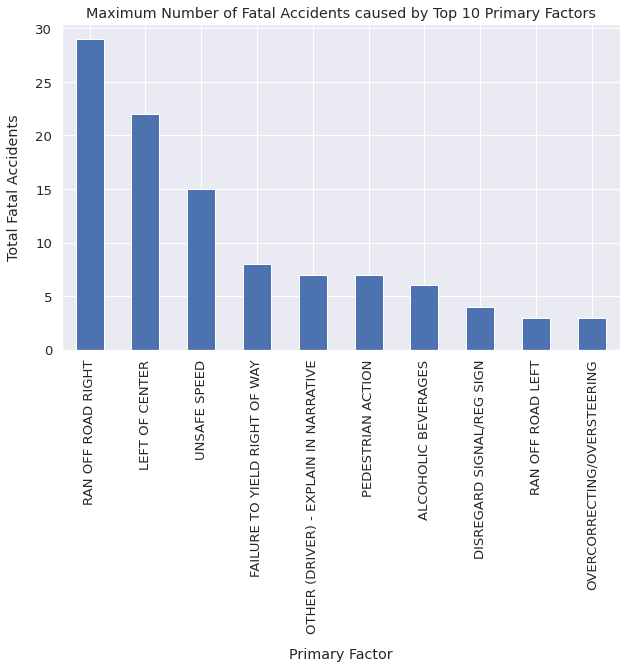

In [ ]:
clean_project[(clean_project['Injury Type'] == 'Fatal')]['Primary Factor'].value_counts().head(10).plot(kind='bar', figsize=(10, 6))
plt.xlabel("Primary Factor", labelpad=14)
plt.ylabel("Total Fatal Accidents", labelpad=14)
plt.title("Maximum Number of Fatal Accidents caused by Top 10 Primary Factors", y=1);

**Top 5 reasons are: ** 
**1. Ran off road right**
**2. Left of center**
**3. Unsafe speed**
**4. Failure to yield right of way**
**5. Pedestrain action**

**Top 5 reasons for Incapacitating accidents:**

In [ ]:
clean_project[(clean_project['Injury Type'] == 'Incapacitating')]['Primary Factor'].value_counts()

FAILURE TO YIELD RIGHT OF WAY               270
RAN OFF ROAD RIGHT                          129
FOLLOWING TOO CLOSELY                       127
OTHER (DRIVER) - EXPLAIN IN NARRATIVE        75
DISREGARD SIGNAL/REG SIGN                    66
LEFT OF CENTER                               61
PEDESTRIAN ACTION                            46
UNSAFE SPEED                                 45
SPEED TOO FAST FOR WEATHER CONDITIONS        32
ALCOHOLIC BEVERAGES                          26
DRIVER DISTRACTED - EXPLAIN IN NARRATIVE     26
DRIVER ILLNESS                               24
IMPROPER TURNING                             24
ANIMAL/OBJECT IN ROADWAY                     17
OVERCORRECTING/OVERSTEERING                  17
ROADWAY SURFACE CONDITION                    16
UNSAFE LANE MOVEMENT                         11
IMPROPER PASSING                             10
DRIVER ASLEEP OR FATIGUED                     8
OTHER (VEHICLE) - EXPLAIN IN NARRATIVE        8
UNSAFE BACKING                          

Top 5 reasons for Incapacitating accidents are:
1. Failure to yield right of way
2. Ran off road right
3. Following too closely
4. Other (driver)
5. Disregard signal/Red sign 

In [ ]:
def series_statistics(column):
  print('statistics for column: {}'.format(column.name))
  print('The max value in the column: {}'.format(column.max()))
  print('The min value in the column: {}'.format(column.min()))
  print('The mode value in the column: {}'.format(column.mode()))
  print('The median value in the column: {}'.format(column.median()))
  print('The mean of the column: {}'.format(column.mean()))
  print('The std of the column: {}'.format(column.std()))

**Is there any correlation between non-rush hour or rush hour driving with total accidents?**

In [ ]:
piv1['Noon_non_rushhour_10am_3pm'].corr(piv1['total'])

0.989758058486509

In [ ]:
piv1['Night_non_rushhour_7pm_0am'].corr(piv1['total'])

0.9568843772376162

In [ ]:
piv1['Morning_non_rushhour_0am_6am'].corr(piv1['total'])

0.6106222529352944

In [ ]:
piv1['evening_rushhour_3pm_7pm'].corr(piv1['total'])

0.9849469290470932

In [ ]:
piv1['morning_rushhour_6am_10am'].corr(piv1['total'])

0.9884231162639441

***Based on the correlation coefficient, total number of accidents do not have any correlation with early morning hour driving (0am-6am) and the rest of the driving has positive correlation with total number of accidents***

In [ ]:
data = [['evening_rushhour_3pm_7pm & total', 0.9849469, 'Positive'], ['morning_rushhour_6am_10am & total', 0.988423,'Positive'],['Morning_non_rushhour_0am_6am & total', 0.6106222, 'Weak'], ['Night_non_rushhour_7pm_0am & total', 0.95688, 'Positive'], ['Noon_non_rushhour_10am_3pm & total', 0.989758, 'Positive']]
pd.options.display.float_format = '{:,.4f}'.format
pd.DataFrame(data, columns=["Time and total number", "Correlation Coefficient", "Correlation"])

,Time and total number,Correlation Coefficient,Correlation
0,evening_rushhour_3pm_7pm & total,0.9849,Positive
1,morning_rushhour_6am_10am & total,0.9884,Positive
2,Morning_non_rushhour_0am_6am & total,0.6106,Weak
3,Night_non_rushhour_7pm_0am & total,0.9569,Positive
4,Noon_non_rushhour_10am_3pm & total,0.9898,Positive


# Hypothesis Testing:
**Is there any significant difference in total accidents between morning rush hour (6am-10am) and morning non-rush hour (0am-6am)?**

In [ ]:
stats.ttest_ind(piv1['morning_rushhour_6am_10am'], piv1['Morning_non_rushhour_0am_6am'])

Ttest_indResult(statistic=1.880679428941098, pvalue=0.06270928827587607)

**Answer 1. The difference between two means is 1.88 standard deviations and p-value > 0.05. So there is no significant difference between morning rush hour and morning non-rush hour**

In [ ]:
stats.ttest_ind(piv1['morning_rushhour_6am_10am'], piv1['evening_rushhour_3pm_7pm'])

Ttest_indResult(statistic=-1.3874685405385154, pvalue=0.1681552439536668)

**Answer2. The difference between two means is 1.38 standard deviations and p-value > 0.05. So there is no significant difference between morning rush hour and evening rush hour**

In [ ]:
stats.ttest_ind(piv1['Morning_non_rushhour_0am_6am'], piv1['evening_rushhour_3pm_7pm'])

Ttest_indResult(statistic=-2.374047375180191, pvalue=0.019360088055147263)

**Since p-value is <0.05, there is a significnt difference in total accidents between morning non-rush hour (0am-6am) and evening rush hour (3pm-7pm)**

In [ ]:
Weekday_driving = clean_project.iloc[(clean_project['Weekend?'] == 'Weekday').values]

In [ ]:
Weekend_driving = clean_project.iloc[(clean_project['Weekend?'] == 'Weekend').values]
#Weekend_driving.info()

In [ ]:
stats.ttest_ind(Weekend_driving['morning_rushhour_6am_10am'], Weekday_driving['morning_rushhour_6am_10am'])

Ttest_indResult(statistic=-19.84559945166534, pvalue=2.5150332606835786e-87)

**There is a significant difference between Weekday and Weekend total accidents occuring during morning rush hour (6am-10am) as p<0.05**



In [ ]:
stats.ttest_ind(Weekend_driving['evening_rushhour_3pm_7pm'], Weekday_driving['evening_rushhour_3pm_7pm'])

Ttest_indResult(statistic=-15.320615183151881, pvalue=7.24692724804376e-53)

**There is a significant difference between Weekday and Weekend total accidents occuring during evening rush hour (3pm-7pm) as p<0.05**

In [ ]:
stats.ttest_ind(Weekend_driving['Morning_non_rushhour_0am_6am'], Weekday_driving['Morning_non_rushhour_0am_6am'])

Ttest_indResult(statistic=33.5159363577058, pvalue=1.0582086943830348e-243)

**There is a significant difference between Weekday and Weekend total accidents occuring during Morning non_rush hour (0am-6am) as p<0.05**

In [ ]:
stats.ttest_ind(Weekend_driving['Night_non_rushhour_7pm_0am'], Weekday_driving['Night_non_rushhour_7pm_0am'])

Ttest_indResult(statistic=21.787592207920788, pvalue=8.865041774739022e-105)

**There is a significant difference between Weekday and Weekend total accidents occuring during Night non-rush hour (7pm-0am) as p<0.05**

In [ ]:
stats.ttest_ind(Weekend_driving['Noon_non_rushhour_10am_3pm'], Weekday_driving['Noon_non_rushhour_10am_3pm'])

Ttest_indResult(statistic=-2.318195867342851, pvalue=0.020442495170344303)

**There is a significant difference between Weekday and Weekend total accidents occuring during Noon non_rush hour (10am-3pm) as p<0.05**

**Answer 3. There is a significant difference between Weekday and Weekend total accidents occuring during evening rush hour (6am-10am) as p<0.05**

In [ ]:
hyp_data = [['Weekend_driving_Noon_non_rushhour_10am_3pm', 'Weekday_driving_Noon_non_rushhour_10am_3pm', 0.02044], ['Weekend_driving_Night_non_rushhour_7pm_0am', 'Weekday_driving_Night_non_rushhour_7pm_0am', '8.865041774739022e-105'],['Weekend_driving_Morning_non_rushhour_0am_6am', 'Weekday_driving_Morning_non_rushhour_0am_6am', 1.0582086943830348e-243], ['Weekend_driving_evening_rushhour_3pm_7pm', 'Weekday_driving_evening_rushhour_3pm_7pm',7.24692724804376e-53], ['Weekend_driving_morning_rushhour_6am_10am', 'Weekday_driving_morning_rushhour_6am_10am',2.5150332606835786e-87]]
pd.options.display.float_format = '{:,.15f}'.format
pd.DataFrame(hyp_data, columns=["Weekend_Time", "Weekday_Time", "p-value"])

,Weekend_Time,Weekday_Time,p-value
0,Weekend_driving_Noon_non_rushhour_10am_3pm,Weekday_driving_Noon_non_rushhour_10am_3pm,0.020440000000000
1,Weekend_driving_Night_non_rushhour_7pm_0am,Weekday_driving_Night_non_rushhour_7pm_0am,8.865041774739022e-105
2,Weekend_driving_Morning_non_rushhour_0am_6am,Weekday_driving_Morning_non_rushhour_0am_6am,0.000000000000000
3,Weekend_driving_evening_rushhour_3pm_7pm,Weekday_driving_evening_rushhour_3pm_7pm,0.000000000000000
4,Weekend_driving_morning_rushhour_6am_10am,Weekday_driving_morning_rushhour_6am_10am,0.000000000000000


In [ ]:
piv2=pd.pivot_table(clean_project,index=["Weekend?"], values=["morning_rushhour_6am_10am", "evening_rushhour_3pm_7pm","Morning_non_rushhour_0am_6am","Noon_non_rushhour_10am_3pm","Night_non_rushhour_7pm_0am"],  aggfunc={"morning_rushhour_6am_10am":np.sum,"evening_rushhour_3pm_7pm":np.sum,"Morning_non_rushhour_0am_6am":np.sum,"Noon_non_rushhour_10am_3pm":np.sum,"Night_non_rushhour_7pm_0am":np.sum})
piv2['total1']=piv2['morning_rushhour_6am_10am'] + piv2['evening_rushhour_3pm_7pm'] + piv2['Morning_non_rushhour_0am_6am'] + piv2['Night_non_rushhour_7pm_0am'] + piv2['Noon_non_rushhour_10am_3pm']
pd.options.display.float_format = '{:.0f}'.format
piv2.sort_values(by=["total1"]).tail(15)

,Morning_non_rushhour_0am_6am,Night_non_rushhour_7pm_0am,Noon_non_rushhour_10am_3pm,evening_rushhour_3pm_7pm,morning_rushhour_6am_10am,total1
Weekend?,,,,,,
Weekend,1906,2219,3301,3868,1594,12888
Weekday,2264,4013,10578,14859,7980,39694


In [ ]:
piv3=pd.pivot_table(clean_project,index=["Reported_Location"], values=["morning_rushhour_6am_10am", "evening_rushhour_3pm_7pm","Morning_non_rushhour_0am_6am","Noon_non_rushhour_10am_3pm","Night_non_rushhour_7pm_0am"],  aggfunc={"morning_rushhour_6am_10am":np.sum,"evening_rushhour_3pm_7pm":np.sum,"Morning_non_rushhour_0am_6am":np.sum,"Noon_non_rushhour_10am_3pm":np.sum,"Night_non_rushhour_7pm_0am":np.sum})
piv3['total2']=piv3['morning_rushhour_6am_10am'] + piv3['evening_rushhour_3pm_7pm'] + piv3['Morning_non_rushhour_0am_6am'] + piv3['Night_non_rushhour_7pm_0am'] + piv3['Noon_non_rushhour_10am_3pm']
pd.options.display.float_format = '{:.0f}'.format
piv3.sort_values(by=['total2']).tail(5)

,Morning_non_rushhour_0am_6am,Night_non_rushhour_7pm_0am,Noon_non_rushhour_10am_3pm,evening_rushhour_3pm_7pm,morning_rushhour_6am_10am,total2
Reported_Location,,,,,,
S WALNUT ST,16,18,49,48,37,168
3RD ST,9,28,54,78,15,184
SR37N & VERNAL,2,14,54,80,46,196
W 3RD ST,4,30,69,76,31,210
E 3RD ST,6,42,114,159,31,352


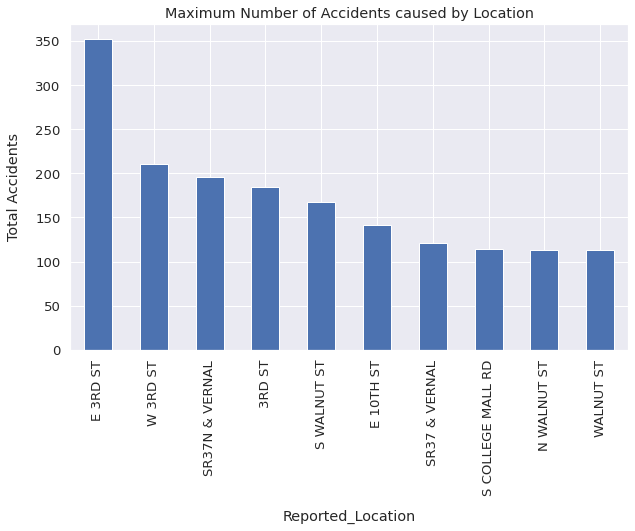

In [ ]:
sns.set(font_scale=1.2)
clean_project['Reported_Location'].value_counts().head(10).plot(kind='bar', figsize=(10, 6))
plt.xlabel("Reported_Location", labelpad=14)
plt.ylabel("Total Accidents", labelpad=14)
plt.title("Maximum Number of Accidents caused by Location", y=1);

In [ ]:
clean_project[(clean_project['Injury Type'] == 'No injury/unknown')]['Reported_Location'].value_counts().head(15)

E 3RD ST              337
W 3RD ST              188
3RD ST                161
S WALNUT ST           151
SR37N & VERNAL        136
E 10TH ST             133
S COLLEGE MALL RD     106
N WALNUT ST           100
WALNUT ST              97
E 17TH ST              92
10TH & COLLEGE AVE     91
N FEE LN               89
EAST 3RD ST            87
SR37S & VERNAL         84
SR37S & TAPP           83
Name: Reported_Location, dtype: int64

In [ ]:
clean_project[(clean_project['Injury Type'] == 'Non-incapacitating')]['Reported_Location'].value_counts().head(15)

SR37N & VERNAL             53
SR37 & VERNAL              42
SR37 & SR45                31
3RD ST & COLLEGE MALL      30
FULLERTON & SR37S          29
3RD ST & JORDAN            28
SR37S & VERNAL             27
SR37S & SR45W              26
LIBERTY & SR45W            26
3RD ST & WASHINGTON        25
SR37S & TAPP               25
13TH & INDIANA AVE         24
3RD ST                     23
ATWATER AVE & HENDERSON    23
SR37S & VICTOR             22
Name: Reported_Location, dtype: int64

In [ ]:
clean_project[(clean_project['Injury Type'] == 'Fatal')]['Reported_Location'].value_counts().head(5)

FLATWOODS & SR46W               3
SR37N & WAYPORT                 2
CLEVE BUTCHER & FAIRFAX RD      2
BRUMMETTS CREEK ROAD & SR46E    1
RHORER RED & SR37               1
Name: Reported_Location, dtype: int64

In [ ]:
clean_project[(clean_project['Injury Type'] == 'Incapacitating')]['Reported_Location'].value_counts().head(5)

SMITHVILLE & SR37S      8
SR37N & VERNAL          7
FULLERTON & SR37S       7
HINDS & SR45W           5
HARTSTRAIGHT & SR46W    4
Name: Reported_Location, dtype: int64

**Answer 4 ** **E 3Rd Street appear to have more accidents out of all the locations**

**Results Summary/Recommendations:**

1. Location **E 3rd street** appear to have more accidents but with no injuries. Drivers involved in accidents at location **SR37N & VERNAL** resulted Incapacitated. So placing caution signage or adding more lanes or reducing the speed limit would minimize the number accidents
2. More patroling can help minimzing the number of accidents at these locations
3. Since there is a difference between weekday and weekend number of accidents at all times and weekday shows more accidents than weekend, more patroling is needed during weekdays
4. Regarding timing, there is no correlation between morning non-rush hour (from 0am-6am) accidents and total accidents. It implies that, early morning time is relatively safe for driving
